# Hollywood Age Gap
## Does age gap between actor/actress matters in hollywood movies?

Import all possible libraries to be used.

In [1]:
import pandas as pd # used for data analysis
import numpy as np # used for linear algebra and random sampling
import matplotlib.pyplot as plt # use to plot the graph
# used for plotting charts within the notebook (instead of a separate window)
%matplotlib inline

Read and study the dataset

In [2]:
# Read the csv file and changed it into UTF-8 format
# Save the file in 'hag'
hag = pd.read_csv("..\Data\movies_missing.csv", encoding='latin-1')

In [3]:
# Function is to let user know about some basic information about the dataset
def raw_dataset():
    while True:
        max_attempts = 3  # Maximum number of user input attempts
        for attempt in range(max_attempts): #if the attempts still less than 3, the for loop will run
            i = input("\nPlease choose the topic that you want to know about the dataset \n"
              "(shape, columns, types, describe, missing, count, nunique): \n")
            if i == 'shape':# Return the number of rows and columns
                print(f"Number of rows and columns in dataset is {hag.shape}.")
            elif i == 'columns':# Return the name of columns
                print(f"Name of columns: \n{hag.columns}")
            elif i == 'types':  # Return the types of data of each column in dataset
                print(f"Types data in dataset: \n{hag.dtypes}")
            elif i == 'describe':  # Return statistical information about the numerical columns
                print(f"Statistical information for numerical columns: \n{hag.describe()}")
            elif i == 'missing':  # Return the total number of missing values
                print(f"Total number of missing values in dataset: \n{hag.isna().sum()}")
            elif i == 'counts':# Return the number of values for specific column
                #Ask the user for the name of column
                column_name = input("Please enter the name of the column (Can refer to hag.columns): ")
                column_functions = {# the value of lambda is print(...)
                    'Movie Name': lambda: print(hag['Movie Name'].value_counts()),
                    'Release Year': lambda: print(hag['Release Year'].value_counts()),
                    'Director': lambda: print(hag['Director'].value_counts()),
                    'Age Difference': lambda: print(hag['Age Difference'].value_counts()),
                    'Actor 1 Name': lambda: print(hag['Actor 1 Name'].value_counts()),
                    'Actor 1 Gender': lambda: print(hag['Actor 1 Gender'].value_counts()),
                    'Actor 1 Birthdate': lambda: print(hag['Actor 1 Birthdate'].value_counts()),
                    'Actor 1 Age': lambda: print(hag['Actor 1 Age'].value_counts()),
                    'Actor 2 Name': lambda: print(hag['Actor 2 Name'].value_counts()),
                    'Actor 2 Gender': lambda: print(hag['Actor 2 Gender'].value_counts()),
                    'Actor 2 Birthdate': lambda: print(hag['Actor 2 Birthdate'].value_counts()),
                    'Actor 2 Age': lambda: print(hag['Actor 2 Age'].value_counts())
                }
                if column_name in column_functions:
                    column_functions[column_name]()
                else:
                    print("Invalid column name. Please try again.")#counts code
            elif i == 'nunique':#Return the number of unique for specific column
                #Ask the user for the name of column
                column_name = input("Please enter the name of the column (Can refer to hag.columns): ")
                column_functions = {# the value of lambda is print(...)
                    'Movie Name': lambda: print(hag['Movie Name'].nunique()),
                    'Release Year': lambda: print(hag['Release Year'].nunique()),
                    'Director': lambda: print(hag['Director'].nunique()),
                    'Age Difference': lambda: print(hag['Age Difference'].nunique()),
                    'Actor 1 Name': lambda: print(hag['Actor 1 Name'].nunique()),
                    'Actor 1 Gender': lambda: print(hag['Actor 1 Gender'].nunique()),
                    'Actor 1 Birthdate': lambda: print(hag['Actor 1 Birthdate'].nunique()),
                    'Actor 1 Age': lambda: print(hag['Actor 1 Age'].nunique()),
                    'Actor 2 Name': lambda: print(hag['Actor 2 Name'].nunique()),
                    'Actor 2 Gender': lambda: print(hag['Actor 2 Gender'].nunique()),
                    'Actor 2 Birthdate': lambda: print(hag['Actor 2 Birthdate'].nunique()),
                    'Actor 2 Age': lambda: print(hag['Actor 2 Age'].nunique())
                }
                if column_name in column_functions:
                    column_functions[column_name]()# the () executes the lambda function
                else:
                    print("Invalid column name. Please try again.")#nunique code
            else:
                print("Invalid input. Please try again.")#overall code
            
            if attempt < max_attempts - 1: #if the attempt still less than 3, it will ask to continue or not
                another_attempt = input("Do you want to know about anything else? (yes/no): \n")
            if another_attempt.lower() != 'yes':#no = break the loop
                break #break for loop    
        break #break while loop

In [4]:
hag.columns

Index(['Movie Name', 'Release Year', 'Director', 'Age Difference',
       'Actor 1 Name', 'Actor 1 Gender', 'Actor 1 Birthdate', 'Actor 1 Age',
       'Actor 2 Name', 'Actor 2 Gender', 'Actor 2 Birthdate', 'Actor 2 Age'],
      dtype='object')

In [44]:
#Call out the function
raw_dataset()


Please choose the topic that you want to know about the dataset 
(shape, columns, types, describe, missing, count, nunique): 
shape
Number of rows and columns in dataset is (1176, 12).
Do you want to know about anything else? (yes/no): 
yes

Please choose the topic that you want to know about the dataset 
(shape, columns, types, describe, missing, count, nunique): 
columns
Name of columns: 
Index(['Movie Title', 'Release Year', 'Director', 'Age Difference',
       '1st Actor Name', '1st Actor Gender', '1st Actor Birthdate',
       '1st Actor Age', '2nd Actor Name', '2nd Actor Gender',
       '2nd Actor Birthdate', '2nd Actor Age'],
      dtype='object', name='Column')
Do you want to know about anything else? (yes/no): 
no


In [6]:
#Return top 10 of datasets
hag.head(10)

,Movie Name,Release Year,Director,Age Difference,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age
0,Harold and Maude,1971.0,Hal Ashby,52.0,Bud Cort,man,29/03/1948,23.0,Ruth Gordon,woman,1896-10-30,75.0
1,Venus,2006.0,Roger Michell,50.0,Peter O'Toole,man,2/08/1932,NaN,Jodie Whittaker,woman,3/06/1982,24.0
2,The Quiet American,2002.0,Phillip Noyce,49.0,Michael Caine,man,14/03/1933,69.0,Do Thi Hai Yen,woman,1/10/1982,20.0
3,The Big Lebowski,1998.0,Joel Coen,45.0,David Huddleston,man,17/09/1930,68.0,Tara Reid,woman,8/11/1975,23.0
4,Beginners,2010.0,Mike Mills,43.0,Christopher Plummer,man,13/12/1929,81.0,Goran Visnjic,man,9/09/1972,38.0
5,Poison Ivy,1992.0,Katt Shea,42.0,Tom Skerritt,man,25/08/1933,59.0,Drew Barrymore,woman,NaN,17.0
6,Whatever Works,2009.0,NaN,40.0,Larry David,man,2/07/1947,62.0,Evan Rachel Wood,NaN,7/09/1987,22.0
7,Entrapment,1999.0,Jon Amiel,39.0,Sean Connery,man,25/08/1930,NaN,Catherine Zeta-Jones,woman,25/09/1969,30.0
8,Husbands and Wives,1992.0,Woody Allen,38.0,Woody Allen,man,1/12/1935,57.0,Juliette Lewis,woman,21/06/1973,19.0
9,NaN,1999.0,Paul Thomas Anderson,38.0,Jason Robards,man,NaN,77.0,Julianne Moore,woman,3/12/1960,39.0


In [7]:
# Return bottom 10 of datasets
hag.tail(10)

,Movie Name,Release Year,Director,Age Difference,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age
1166,Spanglish,2004.0,James L. Brooks,0.0,Adam Sandler,man,9/09/1966,38.0,Tea Leoni,woman,25/02/1966,38.0
1167,Speed,1994.0,Jan de Bont,0.0,Keanu Reeves,man,2/09/1964,30.0,NaN,woman,26/07/1964,30.0
1168,Spider-Man: Far From Home,2019.0,Jon Watts,0.0,Tom Holland,man,1/06/1996,23.0,Zendaya,woman,1/09/1996,23.0
1169,The Crush,1993.0,Alan Shapiro,0.0,Cary Elwes,man,26/10/1962,31.0,Jennifer Rubin,woman,3/04/1962,31.0
1170,The Holiday,2006.0,Nancy Meyers,0.0,Jude Law,man,29/12/1972,34.0,Cameron Diaz,woman,30/08/1972,34.0
1171,The Hunger Games: Catching Fire,2013.0,Francis Lawrence,0.0,Liam Hemsworth,man,13/01/1990,23.0,Jennifer Lawrence,woman,15/08/1990,23.0
1172,The Lake House,2006.0,Alejandro Agresti,0.0,Keanu Reeves,man,2/09/1964,42.0,Sandra Bullock,woman,26/07/1964,42.0
1173,Tolkien,2019.0,Dome Karukoski,0.0,Nicholas Hoult,man,7/12/1989,30.0,Lily Collins,woman,18/03/1989,30.0
1174,Transformers,2007.0,Michael Bay,0.0,Shia LaBeouf,man,11/06/1986,21.0,Megan Fox,woman,16/05/1986,21.0
1175,X-Men: First Class,2015.0,Matthew Vaughn,0.0,James McAvoy,man,21/04/1979,36.0,Rose Byrne,woman,24/07/1979,36.0


In [8]:
#Return statistical informations about the numerical columns
hag.describe()

,Release Year,Age Difference,Actor 1 Age,Actor 2 Age
count,1174.000000,1170.000000,1166.000000,1171.000000
mean,2000.756388,10.436752,39.859348,31.267293
std,16.649497,8.464075,10.773156,8.444760
min,1935.000000,0.000000,17.000000,17.000000
25%,1997.000000,4.000000,32.000000,26.000000
50%,2004.000000,8.000000,39.000000,30.000000
75%,2012.000000,15.000000,47.000000,35.000000
max,2023.000000,52.000000,81.000000,81.000000


In [9]:
#Return some informations about non-numerical columns
hag.describe(include='object')

,Movie Name,Director,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate
count,1168,1167,1170,1169,1165,1167,1168,1166
unique,841,521,498,2,495,564,2,562
top,Love Actually,Woody Allen,Keanu Reeves,man,2/09/1964,Reese Witherspoon,woman,21/03/1976
freq,7,18,27,1153,27,15,1152,15


In [10]:
#Total counts
print(hag['Movie Name'].value_counts().sum())
print(hag['Director'].value_counts().sum())
print(hag['Actor 1 Name'].value_counts().sum())
print(hag['Actor 1 Gender'].value_counts().sum())
print(hag['Actor 1 Birthdate'].value_counts().sum())

1168
1167
1170
1169
1165


In [11]:
#Number of unique
print(hag['Movie Name'].nunique())
print(hag['Director'].nunique())
print(hag['Actor 1 Name'].nunique())
print(hag['Actor 1 Gender'].nunique())
print(hag['Actor 1 Birthdate'].nunique())

841
521
498
2
495


In [12]:
print(f"{hag['Director'].value_counts()} \n")
print(hag['Actor 1 Name'].value_counts())

Director
Woody Allen            18
John Glen              15
Martin Scorsese        13
David Fincher           9
Dennis Dugan            9
                       ..
Joel Schumacher         1
Abdellatif Kechiche     1
Alex Kurtzman           1
Peter Berg              1
Dome Karukoski          1
Name: count, Length: 521, dtype: int64 

Actor 1 Name
Keanu Reeves         27
Adam Sandler         20
Sean Connery         17
Roger Moore          17
Leonardo DiCaprio    17
                     ..
Edward Burns          1
Bill Pullman          1
Mike Birbiglia        1
Ricky Gervais         1
Jay Baruchel          1
Name: count, Length: 498, dtype: int64


Start cleaning the data

In [13]:
#Create new index instead of replacing it with other column
hag.index.name='Movie Index'

In [14]:
#Check the new index
hag.head(10)

,Movie Name,Release Year,Director,Age Difference,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age
Movie Index,,,,,,,,,,,,
0,Harold and Maude,1971.0,Hal Ashby,52.0,Bud Cort,man,29/03/1948,23.0,Ruth Gordon,woman,1896-10-30,75.0
1,Venus,2006.0,Roger Michell,50.0,Peter O'Toole,man,2/08/1932,NaN,Jodie Whittaker,woman,3/06/1982,24.0
2,The Quiet American,2002.0,Phillip Noyce,49.0,Michael Caine,man,14/03/1933,69.0,Do Thi Hai Yen,woman,1/10/1982,20.0
3,The Big Lebowski,1998.0,Joel Coen,45.0,David Huddleston,man,17/09/1930,68.0,Tara Reid,woman,8/11/1975,23.0
4,Beginners,2010.0,Mike Mills,43.0,Christopher Plummer,man,13/12/1929,81.0,Goran Visnjic,man,9/09/1972,38.0
5,Poison Ivy,1992.0,Katt Shea,42.0,Tom Skerritt,man,25/08/1933,59.0,Drew Barrymore,woman,NaN,17.0
6,Whatever Works,2009.0,NaN,40.0,Larry David,man,2/07/1947,62.0,Evan Rachel Wood,NaN,7/09/1987,22.0
7,Entrapment,1999.0,Jon Amiel,39.0,Sean Connery,man,25/08/1930,NaN,Catherine Zeta-Jones,woman,25/09/1969,30.0
8,Husbands and Wives,1992.0,Woody Allen,38.0,Woody Allen,man,1/12/1935,57.0,Juliette Lewis,woman,21/06/1973,19.0


In [15]:
#Return the types of data for each column
pd.DataFrame(hag.dtypes, columns = ['Type'])

,Type
Movie Name,object
Release Year,float64
Director,object
Age Difference,float64
Actor 1 Name,object
Actor 1 Gender,object
Actor 1 Birthdate,object
Actor 1 Age,float64
Actor 2 Name,object
Actor 2 Gender,object


In [16]:
#Change 'Release Year','Age Difference','Actor 1 Age','Actor 2 Age' into int
columns_int = ['Release Year','Age Difference','Actor 1 Age','Actor 2 Age'] #Choose column to convert
hag[columns_int] = hag[columns_int].fillna(0).astype(int) #Fill missing values with 0 before converting into int

In [18]:
#Change birthdate from string to datetime 
columns_datetime = ['Actor 1 Birthdate', 'Actor 2 Birthdate']
for col in columns_datetime:
    hag[col] = hag[col].apply(lambda x: pd.to_datetime(x, dayfirst=True))
    #.apply(): applies a function to each value in the selected column.
    #lambda: used to convert each date string 'x' to a pandas datetime object
    #dayfirst: inform pandas that the day component comes before the month component in your date strings

In [19]:
#Check converted data types for each column
pd.DataFrame(hag.dtypes, columns = ['Type'])

,Type
Movie Name,object
Release Year,int32
Director,object
Age Difference,int32
Actor 1 Name,object
Actor 1 Gender,object
Actor 1 Birthdate,datetime64[ns]
Actor 1 Age,int32
Actor 2 Name,object
Actor 2 Gender,object


In [20]:
# Sorting the index in ascending order
hag.sort_values(['Release Year'], ascending=True, inplace=True)

In [21]:
#Check the order of 'Release Year'
hag.head(10)

,Movie Name,Release Year,Director,Age Difference,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age
Movie Index,,,,,,,,,,,,
1141,Wonder,0,Stephen Chbosky,1,Owen Wilson,man,1968-11-18,49,Julia Roberts,woman,1967-10-28,50
1096,Juno,0,Jason Reitman,1,Michael Cera,man,1988-06-07,19,Ellen Page,woman,1987-02-21,20
190,Star of Midnight,1935,Stephen Roberts,19,William Powell,man,1892-06-29,43,Ginger Rogers,woman,1911-07-16,24
644,Captain Blood,1935,Michael Curtiz,7,Errol Flynn,man,1909-06-20,26,Olivia de Havilland,woman,1916-07-01,19
145,Modern Times,1936,Charlie Chaplin,21,Charlie Chaplin,man,1889-04-16,47,Paulette Goddard,woman,1910-06-03,26
524,A Star Is Born,1937,William A. Wellman,9,Fredric March,man,1897-08-31,40,Janet Gaynor,woman,1906-10-06,31
1119,Stella Dallas,1937,King Vidor,1,Tim Holt,man,1919-02-05,18,Anne Shirley,woman,1918-04-17,19
410,Stella Dallas,1937,King Vidor,12,John Boles,man,1895-10-28,42,Barbara Stanwyck,woman,1907-07-16,30
395,Gone with the Wind,1939,Victor Fleming,12,Clark Gable,man,1901-02-01,38,Vivien Leigh,woman,1913-11-05,26


In [22]:
#Rename the columns
hag.rename(columns={'Movie Name':'Movie Title',
                    'Actor 1 Name':'1st Actor Name',
                    'Actor 1 Gender':'1st Actor Gender',
                    'Actor 1 Birthdate':'1st Actor Birthdate',
                    'Actor 1 Age':'1st Actor Age',
                    'Actor 2 Name':'2nd Actor Name',
                    'Actor 2 Gender':'2nd Actor Gender',
                    'Actor 2 Birthdate':'2nd Actor Birthdate',
                    'Actor 2 Age':'2nd Actor Age'
                   }, inplace=True)

In [23]:
#Check if the column name already change or not
hag.head()

,Movie Title,Release Year,Director,Age Difference,1st Actor Name,1st Actor Gender,1st Actor Birthdate,1st Actor Age,2nd Actor Name,2nd Actor Gender,2nd Actor Birthdate,2nd Actor Age
Movie Index,,,,,,,,,,,,
1141,Wonder,0,Stephen Chbosky,1,Owen Wilson,man,1968-11-18,49,Julia Roberts,woman,1967-10-28,50
1096,Juno,0,Jason Reitman,1,Michael Cera,man,1988-06-07,19,Ellen Page,woman,1987-02-21,20
190,Star of Midnight,1935,Stephen Roberts,19,William Powell,man,1892-06-29,43,Ginger Rogers,woman,1911-07-16,24
644,Captain Blood,1935,Michael Curtiz,7,Errol Flynn,man,1909-06-20,26,Olivia de Havilland,woman,1916-07-01,19
145,Modern Times,1936,Charlie Chaplin,21,Charlie Chaplin,man,1889-04-16,47,Paulette Goddard,woman,1910-06-03,26


In [24]:
#Creating a table for missing values
null_hag = pd.DataFrame(hag.isnull().sum(), columns=['Count of Nulls'])
null_hag.index.name = 'Column'
null_hag.sort_values(['Count of Nulls'], ascending=False).head(10)

,Count of Nulls
Column,
1st Actor Birthdate,11
2nd Actor Birthdate,10
Director,9
2nd Actor Name,9
Movie Title,8
2nd Actor Gender,8
1st Actor Gender,7
1st Actor Name,6
Release Year,0


In [25]:
#Replace missing value
hag.fillna(value={'1st Actor Birthdate': 'Lay Eggs',
                  '2nd Actor Birthdate': 'Lay Eggs',
                  'Director': 'Run Away',
                  'Movie Title': 'No Title',
                  '1st Actor Gender': 'Prefer Not To Tell',
                  '2nd Actor Gender': 'Prefer Not To Tell',
                  'Age Difference': 'Same',
                  '1st Actor Name': 'They',
                  '2nd Actor Name': 'They'
                 }, inplace=True)
# #Save new values in a new variable
# new_values = hag.fillna(value={'Actor 1 Birthdate': 'Lay Eggs',
#                                'Actor 1 Age': 'Immortal',
#                                'Actor 2 Age': 'Immortal',
#                                'Actor 2 Birthdate': 'Lay Eggs',
#                                'Director': 'Run Away',
#                                'Actor 2 Name': 'They',
#                                'Movie Name': 'No Title',
#                                'Actor 2 Gender': 'Prefer Not To Tell',
#                                'Actor 1 Gender': 'Prefer Not To Tell',
#                                'Age Difference': 'Same',
#                                'Actor 2 Name': 'They'
#                               }).head(15)

In [26]:
#Check the total number of missing value back
pd.DataFrame(hag.isna().sum(), columns = ['Missing Values'])

,Missing Values
Column,
Movie Title,0
Release Year,0
Director,0
Age Difference,0
1st Actor Name,0
1st Actor Gender,0
1st Actor Birthdate,0
1st Actor Age,0
2nd Actor Name,0


Choose a few data to be used for data visualisation

In [27]:
#Select a few columns for data visualisation
hag[['Age Difference']].head(10)

Column,Age Difference
Movie Index,
1141,1
1096,1
190,19
644,7
145,21
524,9
1119,1
410,12
395,12


In [28]:
hag[['Movie Title', 'Director']].head(10)

Column,Movie Title,Director
Movie Index,,
1141,Wonder,Stephen Chbosky
1096,Juno,Jason Reitman
190,Star of Midnight,Stephen Roberts
644,Captain Blood,Michael Curtiz
145,Modern Times,Charlie Chaplin
524,A Star Is Born,William A. Wellman
1119,Stella Dallas,King Vidor
410,Stella Dallas,King Vidor
395,Gone with the Wind,Victor Fleming


In [29]:
hag[['1st Actor Age', '2nd Actor Age']].head(10)

Column,1st Actor Age,2nd Actor Age
Movie Index,,
1141,49,50
1096,19,20
190,43,24
644,26,19
145,47,26
524,40,31
1119,18,19
410,42,30
395,38,26


In [30]:
#Function for percentage for man and woman
#accepts first arguments as 'df', then use *args to accept additional arguments
def calculate_gender_percentage(df, *args):
    #calculate the total number of rows in the dataframe (no of actors)
    total_count = len(df)
    
    for column in args:
        if column in df.columns:#Check if the column exist on hag or not
            gender_counts = df[column].value_counts()#calculate number of man, woman and PNTT and save in variable
            for gender, count in gender_counts.items():
                percentage = (count / total_count) * 100
                print(f"Percentage of {gender} in {column}: {percentage:.2f}%")
        else:
            print(f"Column '{column}' not found in the DataFrame")

In [31]:
#Clarify the function
hag.columns
# hag['2nd Actor Gender'].value_counts()
# hag['1st Actor Gender'].value_counts()

Index(['Movie Title', 'Release Year', 'Director', 'Age Difference',
       '1st Actor Name', '1st Actor Gender', '1st Actor Birthdate',
       '1st Actor Age', '2nd Actor Name', '2nd Actor Gender',
       '2nd Actor Birthdate', '2nd Actor Age'],
      dtype='object', name='Column')

In [32]:
# Calculate percentage of man and woman
calculate_gender_percentage(hag, '1st Actor Gender', '2nd Actor Gender')

Percentage of man in 1st Actor Gender: 98.04%
Percentage of woman in 1st Actor Gender: 1.36%
Percentage of Prefer Not To Tell in 1st Actor Gender: 0.60%
Percentage of woman in 2nd Actor Gender: 97.96%
Percentage of man in 2nd Actor Gender: 1.36%
Percentage of Prefer Not To Tell in 2nd Actor Gender: 0.68%


Visualise the data

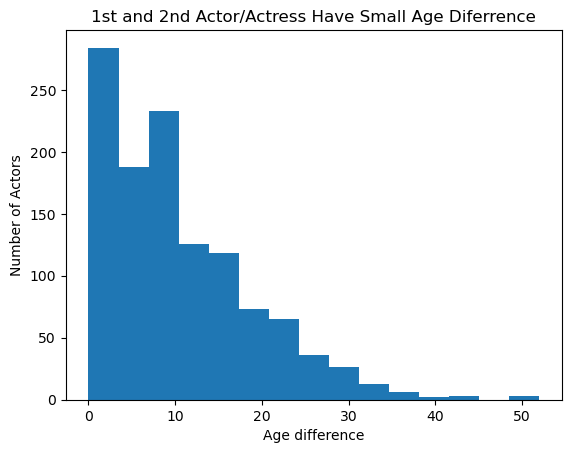

In [42]:
#Plot histogram for age difference
hag['Age Difference'].plot(kind='hist', bins=15)#there are 15 blocks
plt.ylabel('Number of Actors')
plt.xlabel('Age difference')
plt.title('1st and 2nd Actor/Actress Have Small Age Diferrence')

plt.show()

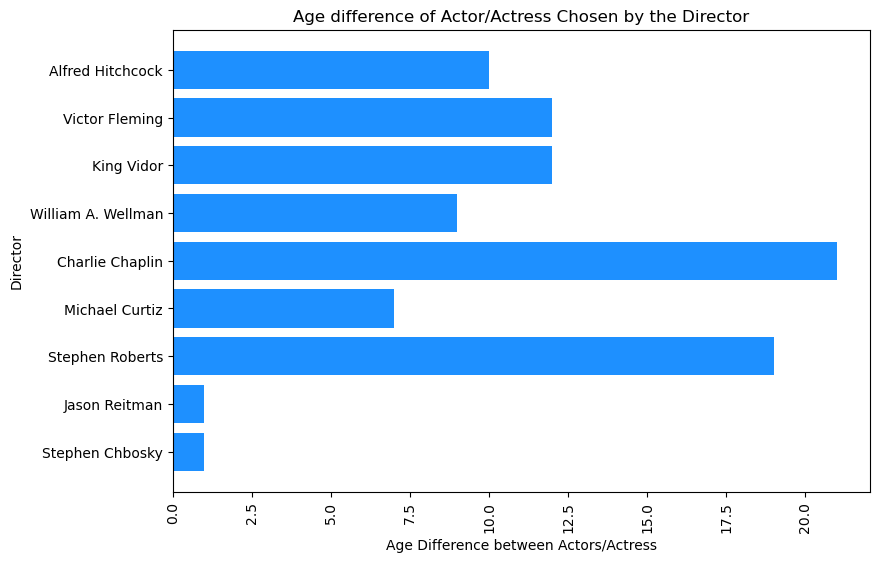

In [41]:
#Plot horizontal bar graph for 10 'director' and 'age difference'
top_10 = hag.head(10)

# Specify the columns to be used as x and y values
director_x = top_10['Director']
age_y = top_10['Age Difference']

# Create a horizontal bar plot 
plt.figure(figsize=(9, 6))#Specify width=9 inch, and height=6 inch
plt.barh(director_x, age_y, color='dodgerblue')
plt.xlabel('Age Difference between Actors/Actress')
plt.xticks(rotation=90)#Rotate x-axis label vertically
plt.ylabel('Director')
plt.title('Age difference of Actor/Actress Chosen by the Director')

plt.show()

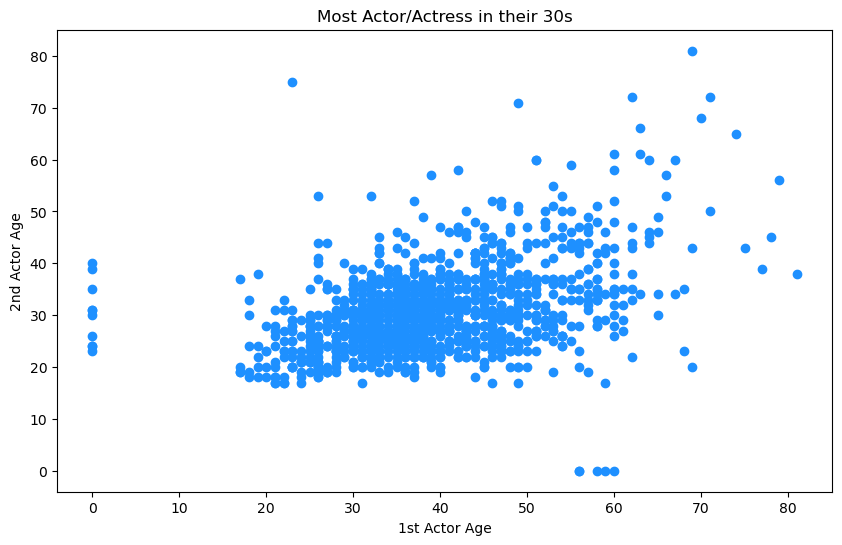

In [35]:
#Plot scatter plot of age for actor 1 and 2
plt.figure(figsize=(10, 6))#Specify width=10 inch, and height=6 inch
plt.scatter(hag['1st Actor Age'], hag['2nd Actor Age'], color='dodgerblue', marker='o')#Marker in 'o' shape
plt.xlabel('1st Actor Age')
plt.ylabel('2nd Actor Age')
plt.title('Most Actor/Actress in their 30s')

plt.show()

Appendix

In [36]:
#Number of Movie Name values mentioned
hag['Movie Title'].value_counts()

Movie Title
No Title                       8
Love Actually                  7
The Family Stone               6
He's Just Not That Into You    5
A View to a Kill               5
                              ..
Miss Congeniality              1
Cast Away                      1
Little Nicky                   1
Love & Basketball              1
Barbie                         1
Name: count, Length: 842, dtype: int64

In [37]:
#Mentioned specific values for specific keys
hag[hag['Movie Title'] == 'Love Actually']

Column,Movie Title,Release Year,Director,Age Difference,1st Actor Name,1st Actor Gender,1st Actor Birthdate,1st Actor Age,2nd Actor Name,2nd Actor Gender,2nd Actor Birthdate,2nd Actor Age
Movie Index,,,,,,,,,,,,
599,Love Actually,2003,Richard Curtis,8,Chiwetel Ejiofor,man,1977-07-10 00:00:00,26,Keira Knightley,woman,1985-03-26 00:00:00,18
79,Love Actually,2003,Richard Curtis,25,Alan Rickman,man,1946-02-21 00:00:00,57,Heike Makatsch,woman,1971-08-13 00:00:00,32
271,Love Actually,2003,Richard Curtis,16,Colin Firth,man,1960-09-10 00:00:00,43,Lucia Moniz,woman,1976-09-09 00:00:00,27
437,Love Actually,2003,Richard Curtis,11,Laura Linney,woman,1964-02-05 00:00:00,39,Rodrigo Santoro,man,1975-08-22 00:00:00,28
678,Love Actually,2003,Richard Curtis,7,Martin Freeman,man,1971-09-08 00:00:00,32,Joanna Page,woman,1978-03-23 00:00:00,25
272,Love Actually,2003,Richard Curtis,16,Hugh Grant,man,1960-09-09 00:00:00,43,Martine McCutcheon,woman,1976-05-14 00:00:00,27
364,Love Actually,2003,Richard Curtis,13,Alan Rickman,man,1946-02-21 00:00:00,57,Emma Thompson,woman,1959-04-15 00:00:00,44


In [37]:
# #Change birthdate into datetime
# columns_datetime = ['Actor 1 Birthdate','Actor 2 Birthdate']
# #Use .apply() to apply function to specified column in DataFrame
# #pd.to_datetime: convert strings to datetime objects
# #format: specify the expected date format
# #errors: handles errors by converting date strings that don't match the specified format to NaT
# hag[columns_datetime] = hag[columns_datetime].apply(pd.to_datetime, format='%d/%m/%Y', errors='coerce')

In [38]:
# #Change the date format from Y/M/D to D/M/Y
# date_format = '%d/%m/%Y'
# #.applymap(): method applies a function to each element of the DataFrame
# #lambda x: checks if the element is not null
# #if not null, it change the date format
# #if null, fill the missing value with 'No Birthdate'
# hag[columns_datetime] = hag[columns_datetime].applymap(lambda x: x.strftime(date_format) if not pd.isnull(x) else 'No birthdate')

In [ ]:
# #Function for percentage for man and woman
# #accepts first arguments as 'df', then use *args to accept additional arguments
# def calculate_gender_percentage(df, *args):
#     #calculate the total number of rows in the dataframe (no of actors)
#     total_count = len(df)
#     # Create an empty dictionary to store percentages
# #     gender_percentages = {}  
    
#     for column in args:
#         if column in df.columns:#Check if the column exist on hag or not
#             gender_counts = df[column].value_counts()#calculate number of man, woman and PNTT and save in variable
#             for gender, count in gender_counts.items():
#                 percentage = (count / total_count) * 100
#                 print(f"Percentage of {gender} in {column}: {percentage:.2f}%")
#         else:
#             print(f"Column '{column}' not found in the DataFrame")
            
# #     return gender_percentages  # Return the gender_percentages dictionary

In [39]:
# #Save percentage of gender in variable
# gender_percentages = calculate_gender_percentage(hag, '1st Actor Gender', '2nd Actor Gender')
# # Create a pie chart using the percentage values
# def plot_pie_chart(gender_percentages):
#     for column, percentages in gender_percentages.items():
#         labels = percentages.keys()
#         sizes = percentages.values()
#         colors = ['blue', 'pink']  # You can customize colors as needed

#         plt.figure(figsize=(6, 6))
#         plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#         plt.title(f"Gender Distribution in {column}")
#         plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#         plt.show()

In [40]:
# plot_pie_chart(gender_percentages)